In [1]:
import yaml
from train_model import *

In [2]:
config_dir = '/home/shiqi/code/Project2-sensor-case/model_combination_Argos/combined_model_20240805/outputs/experiment_1/config.yaml'
config = read_config_file(config_dir)

In [3]:
import numpy as np
import torch

# Define the save directory
save_dir = config['save_dir']

# Load linear model results
linear_mean_relative_errors_train = np.load(save_dir + '/linear_mean_relative_errors_train.npy')
linear_mean_relative_errors_test = np.load(save_dir + '/linear_mean_relative_errors_test.npy')
linear_mean_relative_diffs_train = np.load(save_dir + '/linear_mean_relative_diffs_train.npy')
linear_mean_relative_diffs_test = np.load(save_dir + '/linear_mean_relative_diffs_test.npy')

# Load residual model results
residual_mean_relative_errors_train = np.load(save_dir + '/residual_mean_relative_errors_train.npy')
residual_mean_relative_errors_test = np.load(save_dir + '/residual_mean_relative_errors_test.npy')
residual_mean_relative_diffs_train = np.load(save_dir + '/residual_mean_relative_diffs_train.npy')
residual_mean_relative_diffs_test = np.load(save_dir + '/residual_mean_relative_diffs_test.npy')

# Load hybrid model results
hybrid_mean_relative_errors_train = np.load(save_dir + '/hybrid_mean_relative_errors_train.npy')
hybrid_mean_relative_errors_test = np.load(save_dir + '/hybrid_mean_relative_errors_test.npy')
hybrid_mean_relative_diffs_train = np.load(save_dir + '/hybrid_mean_relative_diffs_train.npy')
hybrid_mean_relative_diffs_test = np.load(save_dir + '/hybrid_mean_relative_diffs_test.npy')

# Load iterative results
iterative_losses = np.load(config['save_dir'] + '/iterative_losses.npy')

# Load subspace model results
subspace_mean_relative_errors_train = np.load(save_dir + '/subspace_mean_relative_errors_train.npy')
subspace_mean_relative_errors_test = np.load(save_dir + '/subspace_mean_relative_errors_test.npy')
subspace_mean_relative_diffs_train = np.load(save_dir + '/subspace_mean_relative_diffs_train.npy')
subspace_mean_relative_diffs_test = np.load(save_dir + '/subspace_mean_relative_diffs_test.npy')


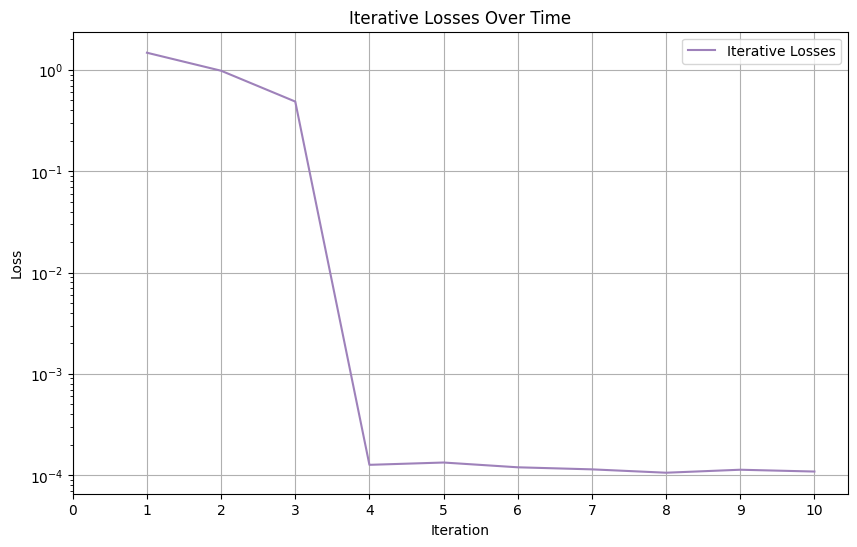

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the iterative losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(iterative_losses) + 1), iterative_losses, label='Iterative Losses', color=(158/255, 129/255, 186/255))
plt.xticks(range(len(iterative_losses) + 1))
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.yscale('log')
plt.title('Iterative Losses Over Time')
plt.grid(True)
plt.legend()
plt.show()

In [5]:
# custom_palette = [
#     (0/255, 0/255, 0/255),         # 黑色 (0, 0, 0)
#     (128/255, 128/255, 128/255),   # 灰色 (128, 128, 128)
#     (158/255, 129/255, 186/255),   # 紫灰色 (158, 129, 186)
#     (216/255, 205/255, 227/255),   # 浅紫色 (216, 205, 227)
#     (76/255, 57/255, 107/255),     # 深紫色 (76, 57, 107)
#     (183/255, 176/255, 196/255),   # 灰蓝色 (183, 176, 196)
#     (115/255, 62/255, 115/255),    # 紫红色 (115, 62, 115)
#     (199/255, 178/255, 199/255)    # 灰紫色 (199, 178, 199)
# ]

custom_palette = [
    (0/255, 51/255, 102/255),      # 深蓝色 (0, 51, 102)
    (104/255, 190/255, 217/255),   # 浅蓝色  RGB: 104 190 217
    (37/255, 125/255, 139/255),    # 深绿色  RGB: 37 125 139
    (191/255, 223/255, 210/255),   # 浅绿色  RGB: 191 223 210
    (237/255, 141/255, 90/255),    # 橙色  RGB: 237 141 90
    (239/255, 206/255, 135/255),   # 黄色  RGB: 239 206 135
    # (234/255, 165/255, 88/255),    # HEX: #EAA558  RGB: 234 165 88
    (194/255, 24/255, 91/255),    # 深粉色 (219, 112, 147)
    (255/255, 182/255, 193/255),   # 浅粉色 (255, 182, 193)
    (0/255, 0/255, 0/255),         # 黑色 (0, 0, 0)
    (128/255, 128/255, 128/255),   # 灰色 (128, 128, 128)
]


/tmp/ipykernel_831349/2110134339.py:40: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  sns.boxplot(data=relative_errors, palette=custom_palette)


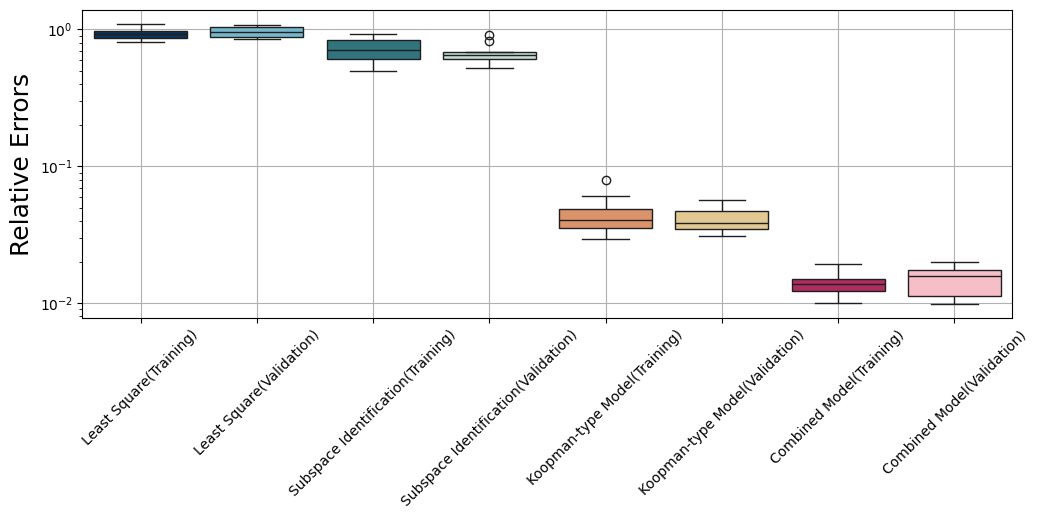

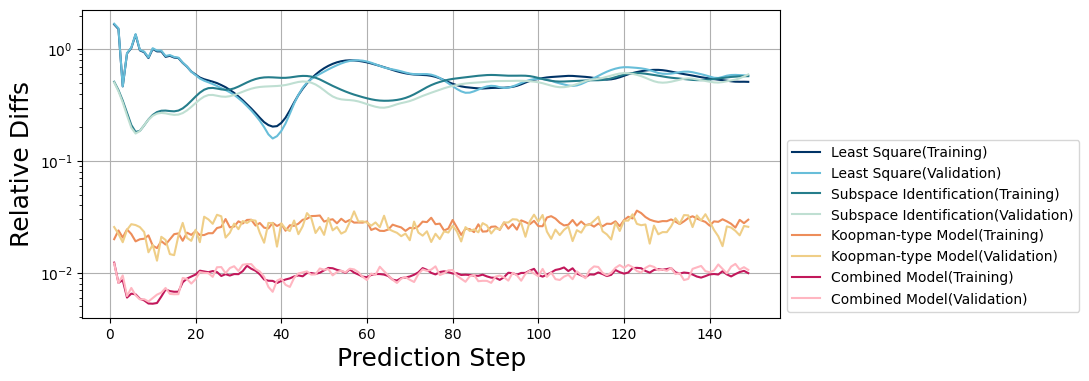

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick  # Import PercentFormatter

plt.rcParams['axes.labelsize'] = 18

# Prepare data for plotting (using your existing data variables)
relative_errors = [
    linear_mean_relative_errors_train, linear_mean_relative_errors_test,
    subspace_mean_relative_errors_train, subspace_mean_relative_errors_test,
    residual_mean_relative_errors_train, residual_mean_relative_errors_test,
    hybrid_mean_relative_errors_train, hybrid_mean_relative_errors_test,
]

relative_diffs = [
    linear_mean_relative_diffs_train, linear_mean_relative_diffs_test,
    subspace_mean_relative_diffs_train, subspace_mean_relative_diffs_test,
    residual_mean_relative_diffs_train, residual_mean_relative_diffs_test,
    hybrid_mean_relative_diffs_train, hybrid_mean_relative_diffs_test
]

# Labels for the boxplots
labels_errors = [
    'Least Square(Training)', 'Least Square(Validation)', 
    'Subspace Identification(Training)', 'Subspace Identification(Validation)',
    'Koopman-type Model(Training)', 'Koopman-type Model(Validation)', 
    'Combined Model(Training)', 'Combined Model(Validation)'
]

labels_diffs = [
    'Least Square(Training Dataset)', 'Least Square(Validation Dataset)', 
    'Subspace Identification(Training Dataset)', 'Subspace Identification(Validation Dataset)',
    'Koopman Model w Trainable Dictionary(Training Dataset)', 'Koopman Model w Trainable Dictionary(Validation Dataset)', 
    'Combined Model(Training Dataset)', 'Combined Model(Validation Dataset)'
]

# Plotting relative errors boxplot
plt.figure(figsize=(12, 4))
sns.boxplot(data=relative_errors, palette=custom_palette)
plt.xticks(ticks=range(len(labels_errors)), labels=labels_errors, rotation=45)
plt.ylabel('Relative Errors')

# Set the y-axis to percentage format
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))  # Assuming errors are fractions like 0.01 = 1%
plt.grid(True)
plt.yscale('log')
plt.show()

# Plotting relative diffs line plot
plt.figure(figsize=(9, 4))
for i in range(len(relative_diffs)):
    plt.plot(range(1, len(relative_diffs[i])), relative_diffs[i][1:], label=labels_errors[i], color=custom_palette[i])

plt.ylabel('Relative Diffs')
plt.xlabel('Prediction Step')

# Set the y-axis to percentage format
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))  # Assuming diffs are fractions
plt.legend(bbox_to_anchor=(1, 0.6))
plt.yscale('log')
plt.grid(True)
plt.show()


In [7]:
x_dataset_train = np.load(config['save_dir'] + '/x_dataset_train.npy')
x_dataset_test = np.load(config['save_dir'] + '/x_dataset_test.npy')
x_data_pred_train_linear = np.load(config['save_dir'] + '/x_data_pred_traj_train_linear.npy')
x_data_pred_test_linear = np.load(config['save_dir'] + '/x_data_pred_traj_test_linear.npy')
x_data_pred_train_residual = np.load(config['save_dir'] + '/x_data_pred_traj_train_residual.npy')
x_data_pred_test_residual = np.load(config['save_dir'] + '/x_data_pred_traj_test_residual.npy')
x_data_pred_train_hybrid = np.load(config['save_dir'] + '/x_data_pred_traj_train_hybrid.npy')
x_data_pred_test_hybrid = np.load(config['save_dir'] + '/x_data_pred_traj_test_hybrid.npy')
x_data_pred_train_subspace = np.load(config['save_dir'] + '/x_data_pred_traj_train_subspace.npy')
x_data_pred_test_subspace = np.load(config['save_dir'] + '/x_data_pred_traj_test_subspace.npy')


In [8]:
x_dataset_test[0].shape

(150, 6957)

In [9]:
np.random.seed(105)
traj_num = 3
indices_num = 4

random_indices = np.random.choice(x_dataset_test[0].shape[1], indices_num, replace=False)
random_traj = np.random.choice(range(len(x_dataset_test)), traj_num, replace=False)
print(random_traj)
print(random_indices)

[6 4 1]
[4904 5893  968 2170]


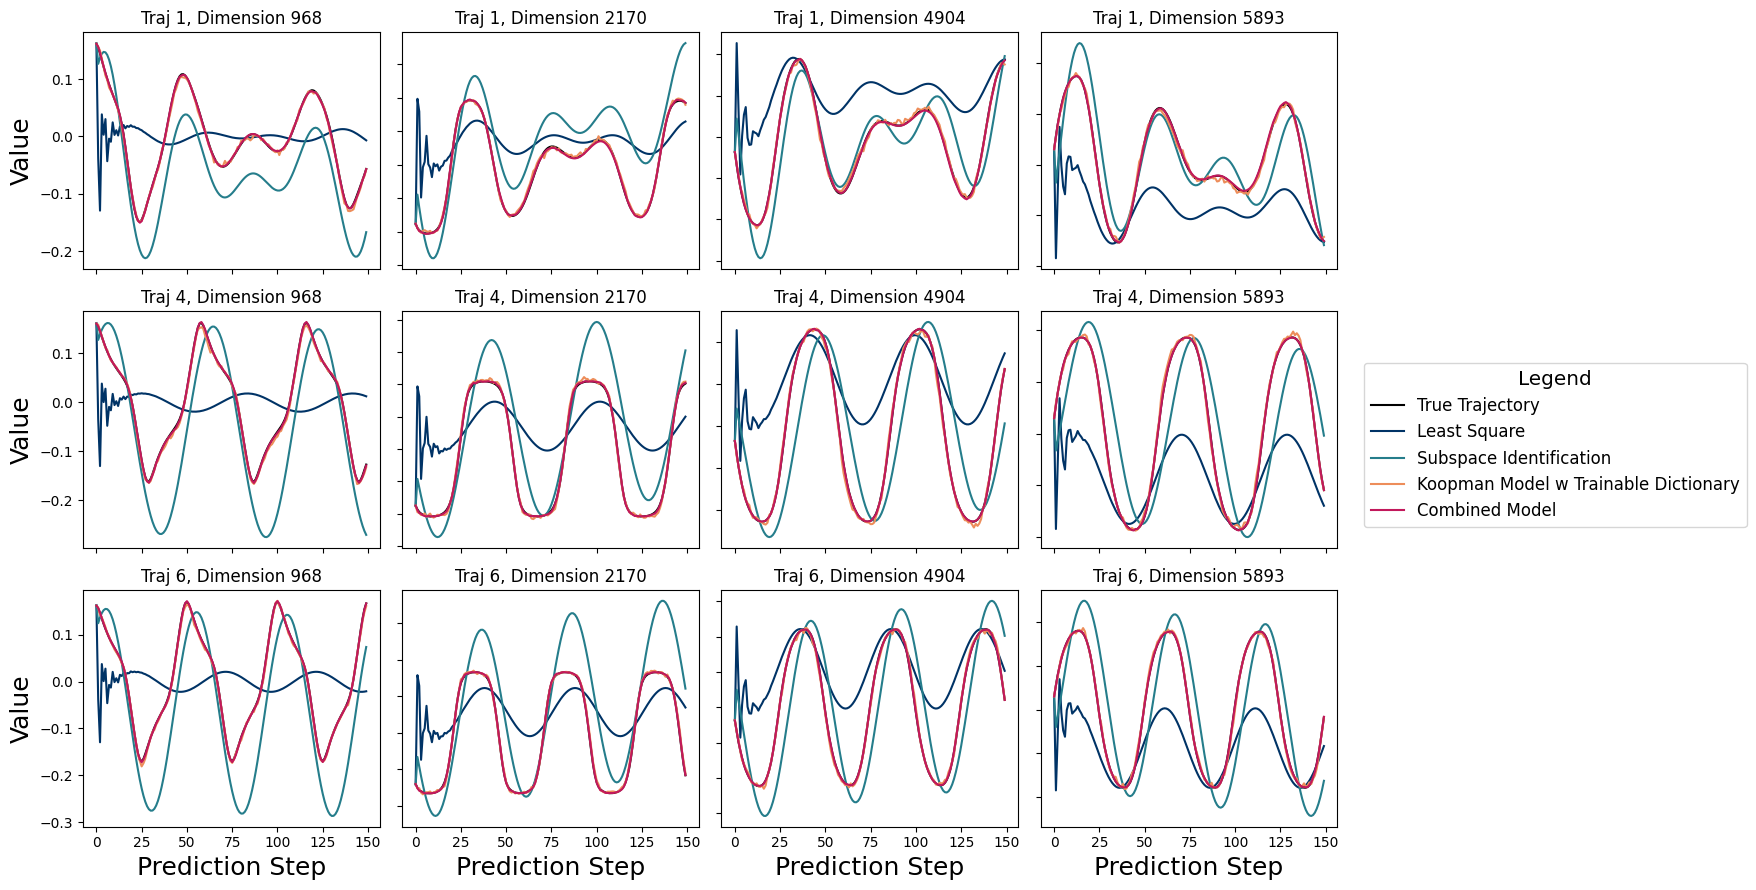

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick  # Import PercentFormatter

plt.rcParams['axes.labelsize'] = 18

labels_plot = [
    'True Trajectory',
    'Least Square',
    'Subspace Identification',
    'Koopman Model w Trainable Dictionary',
    'Combined Model',
]
# Sorting the random_traj and random_indices
random_traj_sorted = np.sort(random_traj)
random_indices_sorted = np.sort(random_indices)

# Creating the figure and subplots
fig, axs = plt.subplots(traj_num, indices_num, figsize=(indices_num * 4, traj_num * 3))

for i in range(traj_num):
    for j in range(indices_num):
        # Getting the trajectories for current subplot
        traj = random_traj_sorted[i]
        idx = random_indices_sorted[j]
        
        # Plot the trajectories
        axs[i, j].plot(x_dataset_test[traj][:, idx], label=labels_plot[0], color = custom_palette[8])
        axs[i, j].plot(x_data_pred_test_linear[traj][:, idx], label=labels_plot[1], color = custom_palette[0])
        axs[i, j].plot(x_data_pred_test_subspace[traj][:, idx], label=labels_plot[2], color = custom_palette[2])
        axs[i, j].plot(x_data_pred_test_residual[traj][:, idx], label=labels_plot[3], color = custom_palette[4])
        axs[i, j].plot(x_data_pred_test_hybrid[traj][:, idx], label=labels_plot[4], color = custom_palette[6])
        
        # Adding the title
        axs[i, j].set_title(f'Traj {traj}, Dimension {idx}')
        axs[i, j].set_xlabel('Prediction Step')
        axs[i, j].set_ylabel('Value')
        
        # Adding the legend
        # axs[i, j].legend()

for ax in axs.flat:
    ax.label_outer()

# 创建全局图例，并将其放在图的右侧之外
handles, labels = axs[0, 0].get_legend_handles_labels()  # 从第一个子图获取标签和句柄
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.1, 0.5), title="Legend", fontsize='large', title_fontsize='x-large')

# 调整子图的布局，使图例不会覆盖图像
plt.tight_layout(rect=[0, 0, 0.85, 1])

# 显示图形
plt.show()


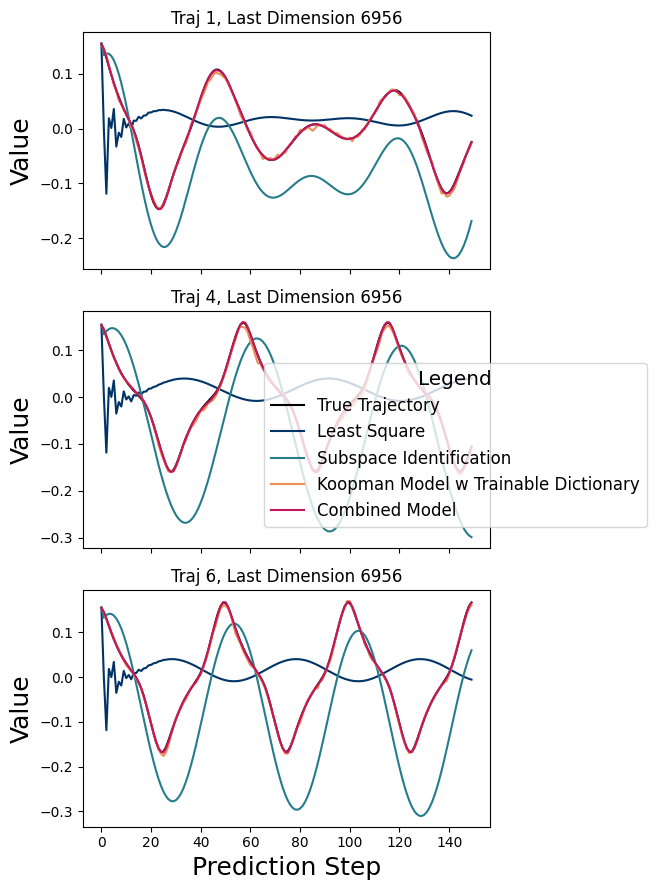

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick  # Import PercentFormatter

plt.rcParams['axes.labelsize'] = 18

labels_plot = [
    'True Trajectory',
    'Least Square',
    'Subspace Identification',
    'Koopman Model w Trainable Dictionary',
    'Combined Model',
]

# Sorting the random_traj and selecting the last dimension of the dataset
random_traj_sorted = np.sort(random_traj)

# Assuming the last dimension is the last column of your dataset
last_dimension_idx = x_dataset_test[0].shape[1] - 1  # The last dimension of the data

# Creating the figure and subplots (one subplot for each trajectory, showing the last dimension)
fig, axs = plt.subplots(traj_num, 1, figsize=(6, traj_num * 3))

for i in range(traj_num):
    # Getting the trajectory for the current subplot
    traj = random_traj_sorted[i]

    # Plot the trajectories for the last dimension
    axs[i].plot(x_dataset_test[traj][:, last_dimension_idx], label=labels_plot[0], color=custom_palette[8])
    axs[i].plot(x_data_pred_test_linear[traj][:, last_dimension_idx], label=labels_plot[1], color=custom_palette[0])
    axs[i].plot(x_data_pred_test_subspace[traj][:, last_dimension_idx], label=labels_plot[2], color=custom_palette[2])
    axs[i].plot(x_data_pred_test_residual[traj][:, last_dimension_idx], label=labels_plot[3], color=custom_palette[4])
    axs[i].plot(x_data_pred_test_hybrid[traj][:, last_dimension_idx], label=labels_plot[4], color=custom_palette[6])
    
    # Adding the title
    axs[i].set_title(f'Traj {traj}, Last Dimension {last_dimension_idx}')
    axs[i].set_xlabel('Prediction Step')
    axs[i].set_ylabel('Value')

for ax in axs.flat:
    ax.label_outer()

# 创建全局图例，并将其放在图的右侧之外
handles, labels = axs[0].get_legend_handles_labels()  # 从第一个子图获取标签和句柄
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.1, 0.5), title="Legend", fontsize='large', title_fontsize='x-large')

# 调整子图的布局，使图例不会覆盖图像
plt.tight_layout(rect=[0, 0, 0.85, 1])

# 显示图形
plt.show()


In [12]:
def calculate_relative_diff(x_true, x_pred):
    row_norm_diff = np.linalg.norm(x_true - x_pred, axis=1, ord=2)
    max_norm = np.max(np.linalg.norm(x_true, axis=1, ord=2))
    relative_diff = row_norm_diff / max_norm
    return relative_diff

def calculate_mean_relative_diff_set(x_true_traj, x_pred_traj):
    relative_diffs = [calculate_relative_diff(x_true, x_pred) for x_true, x_pred in zip(x_true_traj, x_pred_traj)]
    mean_relative_diffs = np.mean(relative_diffs, axis=0)
    return mean_relative_diffs

def calculate_relative_error(x_true, x_pred):
    row_norm_diff = np.linalg.norm(x_true - x_pred, ord='fro')
    total_norm_true = np.linalg.norm(x_true, ord='fro')
    return row_norm_diff / total_norm_true

def calculate_mean_relative_error_set(x_true_traj, x_pred_traj):
    relative_errors = [calculate_relative_error(x_true, x_pred) for x_true, x_pred in zip(x_true_traj, x_pred_traj)]
    return relative_errors

In [13]:
# 对于每个list中的array进行[:, -1:0]的切片操作，并生成新的列表
x_dataset_train_Ip = [arr[:, -1:0] for arr in x_dataset_train]
x_dataset_test_Ip = [arr[:, -1:0] for arr in x_dataset_test]
x_data_pred_train_linear_Ip = [arr[:, -1:0] for arr in x_data_pred_train_linear]
x_data_pred_test_linear_Ip = [arr[:, -1:0] for arr in x_data_pred_test_linear]
x_data_pred_train_residual_Ip = [arr[:, -1:0] for arr in x_data_pred_train_residual]
x_data_pred_test_residual_Ip = [arr[:, -1:0] for arr in x_data_pred_test_residual]
x_data_pred_train_hybrid_Ip = [arr[:, -1:0] for arr in x_data_pred_train_hybrid]
x_data_pred_test_hybrid_Ip = [arr[:, -1:0] for arr in x_data_pred_test_hybrid]
x_data_pred_train_subspace_Ip = [arr[:, -1:0] for arr in x_data_pred_train_subspace]
x_data_pred_test_subspace_Ip = [arr[:, -1:0] for arr in x_data_pred_test_subspace]

# 现在这些新列表包含了每个array经过切片处理后的结果

np.save(config['save_dir'] + '/x_dataset_train_Ip.npy', x_dataset_train_Ip)
np.save(config['save_dir'] + '/x_dataset_test_Ip.npy', x_dataset_test_Ip)
np.save(config['save_dir'] + '/x_data_pred_train_linear_Ip.npy', x_data_pred_train_linear_Ip)
np.save(config['save_dir'] + '/x_data_pred_test_linear_Ip.npy', x_data_pred_test_linear_Ip)
np.save(config['save_dir'] + '/x_data_pred_train_residual_Ip.npy', x_data_pred_train_residual_Ip)
np.save(config['save_dir'] + '/x_data_pred_test_residual_Ip.npy', x_data_pred_test_residual_Ip)
np.save(config['save_dir'] + '/x_data_pred_train_hybrid_Ip.npy', x_data_pred_train_hybrid_Ip)
np.save(config['save_dir'] + '/x_data_pred_test_hybrid_Ip.npy', x_data_pred_test_hybrid_Ip)
np.save(config['save_dir'] + '/x_data_pred_train_subspace_Ip.npy', x_data_pred_train_subspace_Ip)
np.save(config['save_dir'] + '/x_data_pred_test_subspace_Ip.npy', x_data_pred_test_subspace_Ip)
